In [ ]:
from google.colab import drive

ROOT = "/content/drive"
print(ROOT)
drive.mount(ROOT)

/content/drive
Mounted at /content/drive


In [ ]:
!wget https://github.com/MaxGhenis/random/raw/master/Roboto-Regular.ttf

ttf-mscorefonts-installer is already the newest version (3.6ubuntu2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
font-manager is already the newest version (0.7.3-1.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
fm.fontManager.ttflist += fm.createFontList(['Roboto-Regular.ttf'])

In [ ]:
%cd drive/MyDrive/NSL-KDD/KDD_acc

/content/drive/MyDrive/NSL-KDD/KDD_acc


In [ ]:
import numpy as np
Grassman_acc_1e4 = np.load('Grassman_acc_dim_30_std_client_20_iter_1000_lr_0.0001_sub_0.1_localEpochs_30.npy')
Grassman_acc_1e5 = np.load('Euclidean_acc_dim_30_std_client_20_iter_1000_lr_0.0001_sub_0.1_localEpochs_30.npy')
Grassman_acc_1e6 = np.load('Euclidean_acc_dim_30_std_client_20_iter_1000_lr_0.0001_sub_0.1_localEpochs_40.npy')
Euclidean_acc_1e4 = np.load('Euclidean_acc_dim_30_std_client_20_iter_1000_lr_0.0001_sub_0.1_localEpochs_60.npy')
Euclidean_acc_1e5 = np.load('Euclidean_acc_dim_30_std_client_20_iter_1000_lr_0.0001_sub_0.1_localEpochs_80.npy')
# Euclidean_acc_1e6 = np.load('Euclidean_acc_dim_9_std_client_20_iter_1000_lr_1e-06_sub_0.1.npy')

In [ ]:
Grassman_acc_1e4.shape

(1001,)

In [ ]:
import matplotlib.pyplot as plt
#plt.rcParams['text.usetex'] = True #Let TeX do the typsetting
#plt.rcParams['text.latex.preamble'] = [r'\usepackage{sansmath}', r'\sansmath'] #Force sans-serif math mode (for axes labels)
plt.rcParams["font.family"] = "Times New Roman"
csfont = {'fontname':'Times New Roman'}
import numpy as np

In [ ]:
Gr_lst_10_acc_30 = []
Eu_lst_10_acc_30 = []
Eu_lst_10_acc_40 = []
Eu_lst_10_acc_60 = []
Eu_lst_10_acc_80 = []

for i in range(500):
  if i%50 == 0:
    Gr_lst_10_acc_30.append(Grassman_acc_30[i]*100)
    Eu_lst_10_acc_30.append(Euclidean_acc_30[i]*100)
    Eu_lst_10_acc_40.append(Euclidean_acc_40[i]*100)
    Eu_lst_10_acc_60.append(Euclidean_acc_60[i]*100)
    Eu_lst_10_acc_80.append(Euclidean_acc_80[i]*100)

In [ ]:
len(Gr_lst_10_acc_30)

10

In [ ]:
Gr_lst_10_acc_30

[0.0,
 83.56990773598297,
 83.77395315826828,
 83.65862313697659,
 83.83161816891412,
 83.78282469836765,
 82.76259758694108,
 82.68275372604684,
 83.29932576295245,
 82.26579134137685]

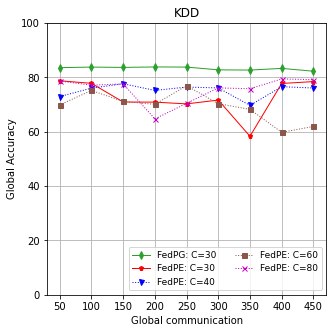

In [ ]:
algorithms = ["FedPG: C=30","FedPE: C=30" ,"FedPE: C=40" ,"FedPE: C=60", "FedPE: C=80"]
linestyles = ['-', '-', ':', ':',':', '--','-.']
markers = ["d","p","v","s","x","*","o"]
colors = [ 'tab:green', 'r', 'blue', 'tab:brown','m', 'tab:brown','slategray']
plt.figure(1,figsize=(10, 19))
# x = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]
# x = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
x = [50, 100, 150, 200, 250, 300, 350, 400, 450]
# x = np.linspace(start=0, stop=100, num=10)
xi = list(range(len(x)))
y = []
y.append(Gr_lst_10_acc_30[1:])
y.append(Eu_lst_10_acc_30[1:])
y.append(Eu_lst_10_acc_40[1:])
y.append(Eu_lst_10_acc_60[1:])
y.append(Eu_lst_10_acc_80[1:])
len(y)
for i in range(len(y)):
    plt.plot(xi, y[i], linestyle=linestyles[i], label=algorithms[i], linewidth  = 1, color=colors[i], marker = markers[i], markevery=0.05, markersize=5)
    plt.xticks(xi, x)
plt.ylabel('Global Accuracy', **csfont)
plt.xlabel(r'Global communication', **csfont)
plt.title("KDD", **csfont)
plt.legend(loc='lower right', prop={'size': 9}, ncol=2)
plt.ylim([0,  100])
#plt.xlim(left=0)
plt.grid(True)
plt.savefig("Acc_comparison.pdf", bbox_inches="tight",pad_inches = 0)
plt.show()